# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('/content/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [ ]:
monthly_count = df ['count'].resample('ME').sum()
monthly_count.head()

,count
datetime,
2011-01-31,23552
2011-02-28,32844
2011-03-31,38735
2011-04-30,50517
2011-05-31,79713


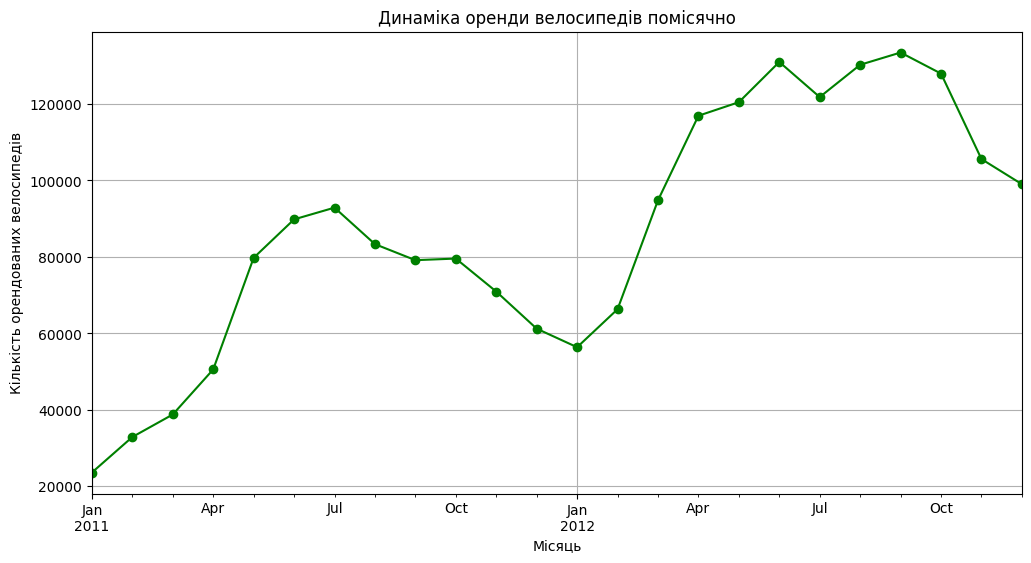

In [ ]:
monthly_count.plot.line(
    marker='o',
    color='green',
    figsize=(12, 6),
    title='Динаміка оренди велосипедів помісячно',
    xlabel='Місяць',
    ylabel='Кількість орендованих велосипедів',
    grid=True
)
plt.show()

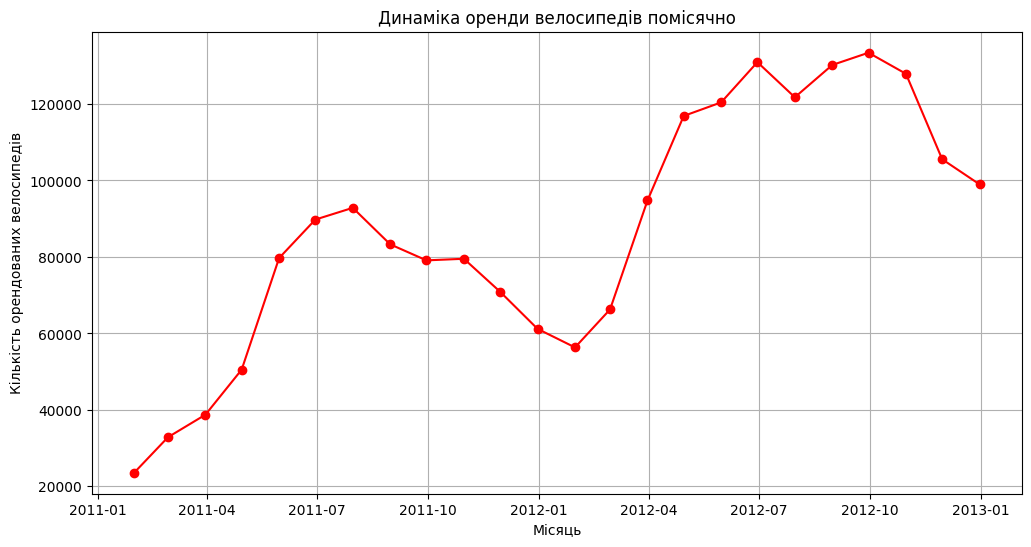

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_count, 'o-r')
plt.title('Динаміка оренди велосипедів помісячно')
plt.xlabel('Місяць')
plt.ylabel('Кількість орендованих велосипедів')
plt.grid(True)

plt.show()

В обох випадках графіки схожі (майже ідентичні). В першому випадку лінії сітки лише горизонтальні, вертикальна одна на межі років. У другому випадку сітка намальована повністю вертикальні і горизонтальні лінії по кожному тіку кожної з осей. Також є відмінності в позначенні місяців на осі ОХ. В першому випадку місяці позначені короткими назвами, рік лише біля першого місяця року. У другому - місяці позначені числами, рік біля кожної позначки. Ще є відмінності у позиціях точок графку. На першому графіку точка стоїть чітко навпроти тіку що позначає місяць. На другому ж тік що позначає місяць відповідає початку місяця (1 числу), точка ж знаходиться навпроти останнього дня місяця, відповідно до того як зазначено у нашому series "2011-01-31	23552", через це графік трохи зміщений вправо. Не можу сказати, що один з цих графіків мені подобається більше за інший, але через описаний вище "зсув", другий графік, мені здається, дещо складніший для сприйняття. Тому віддаю перевагу графіку побудованому за допомогою Pandas.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [ ]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

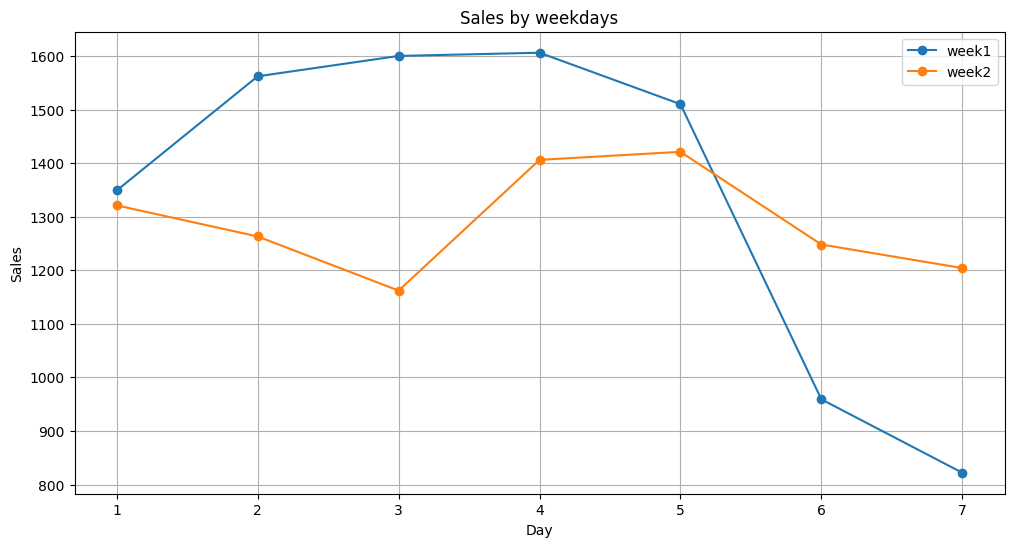

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(days, sales_week1, 'o-', label='week1')
plt.plot(days, sales_week2, 'o-', label='week2')
plt.title('Sales by weekdays')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()

plt.show()

1. Більш плавний графік продажів другого тижня говорить про те, що продажі цього тижня були стабільніше.
2. Висновок можна підкріпити обчисливши діапазон значень для кожного тижня max(sales_week*) - min (sales_week*). Менший діапазон = стабільніше продажі.

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

In [ ]:
monthly_temp = df ['temp'].resample('ME').mean()
qtrly_count = df.groupby('season') ['count'].mean()

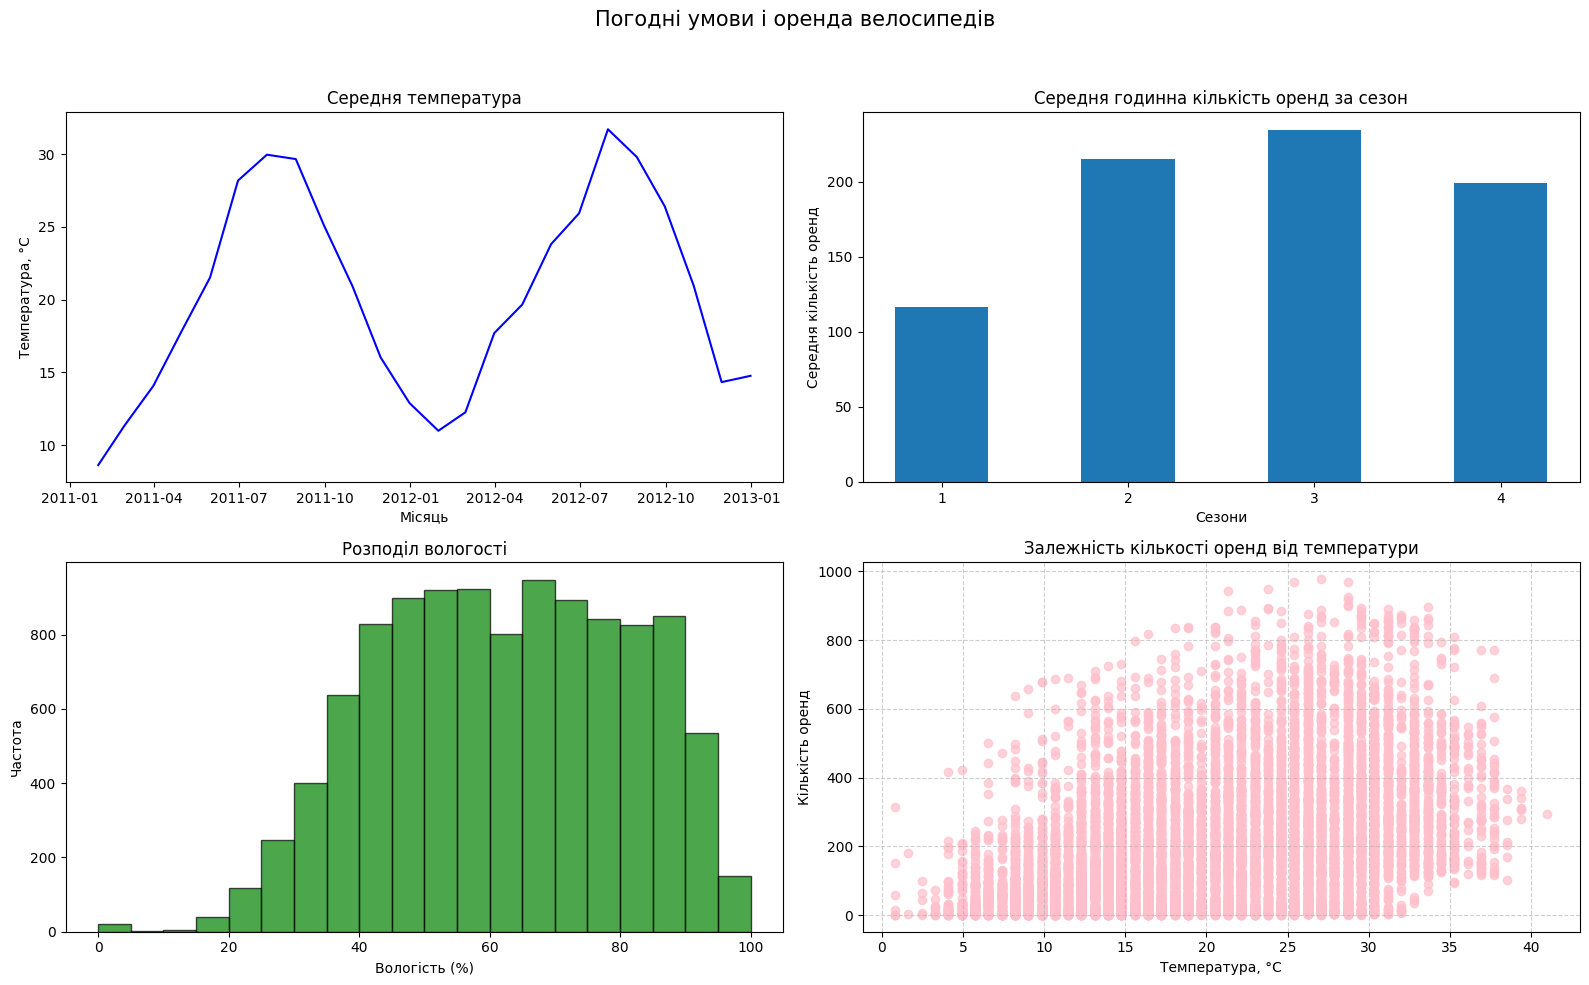

In [ ]:
plt.figure(figsize=(16, 10))

# Лінійний графік
plt.subplot(2, 2, 1)
plt.plot(monthly_temp, color='blue')
plt.title('Середня температура')
plt.xlabel('Місяць')
plt.ylabel('Температура, °С')

# Стовпчиковий графік
plt.subplot(2, 2, 2)
plt.bar(qtrly_count.index, qtrly_count.values, 0.5)
plt.xticks(qtrly_count.index)
plt.title('Середня годинна кількість оренд за сезон')
plt.xlabel('Сезони')
plt.ylabel('Середня кількість оренд')

# Гістограма
plt.subplot(2, 2, 3)
plt.hist(df ['humidity'], bins=20, edgecolor='black', alpha=0.7, color='green')
plt.title('Розподіл вологості')
plt.xlabel('Вологість (%)')
plt.ylabel('Частота')

# Графік розсіювання
plt.subplot(2, 2, 4)
plt.scatter(df ['temp'], df ['count'], color='pink', alpha=0.7)
plt.title('Залежність кількості оренд від температури')
plt.xlabel('Температура, °C')
plt.ylabel('Кількість оренд')
plt.grid(True, linestyle='--', alpha=0.6)

# Заголовок дашборду
plt.suptitle('Погодні умови і оренда велосипедів', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

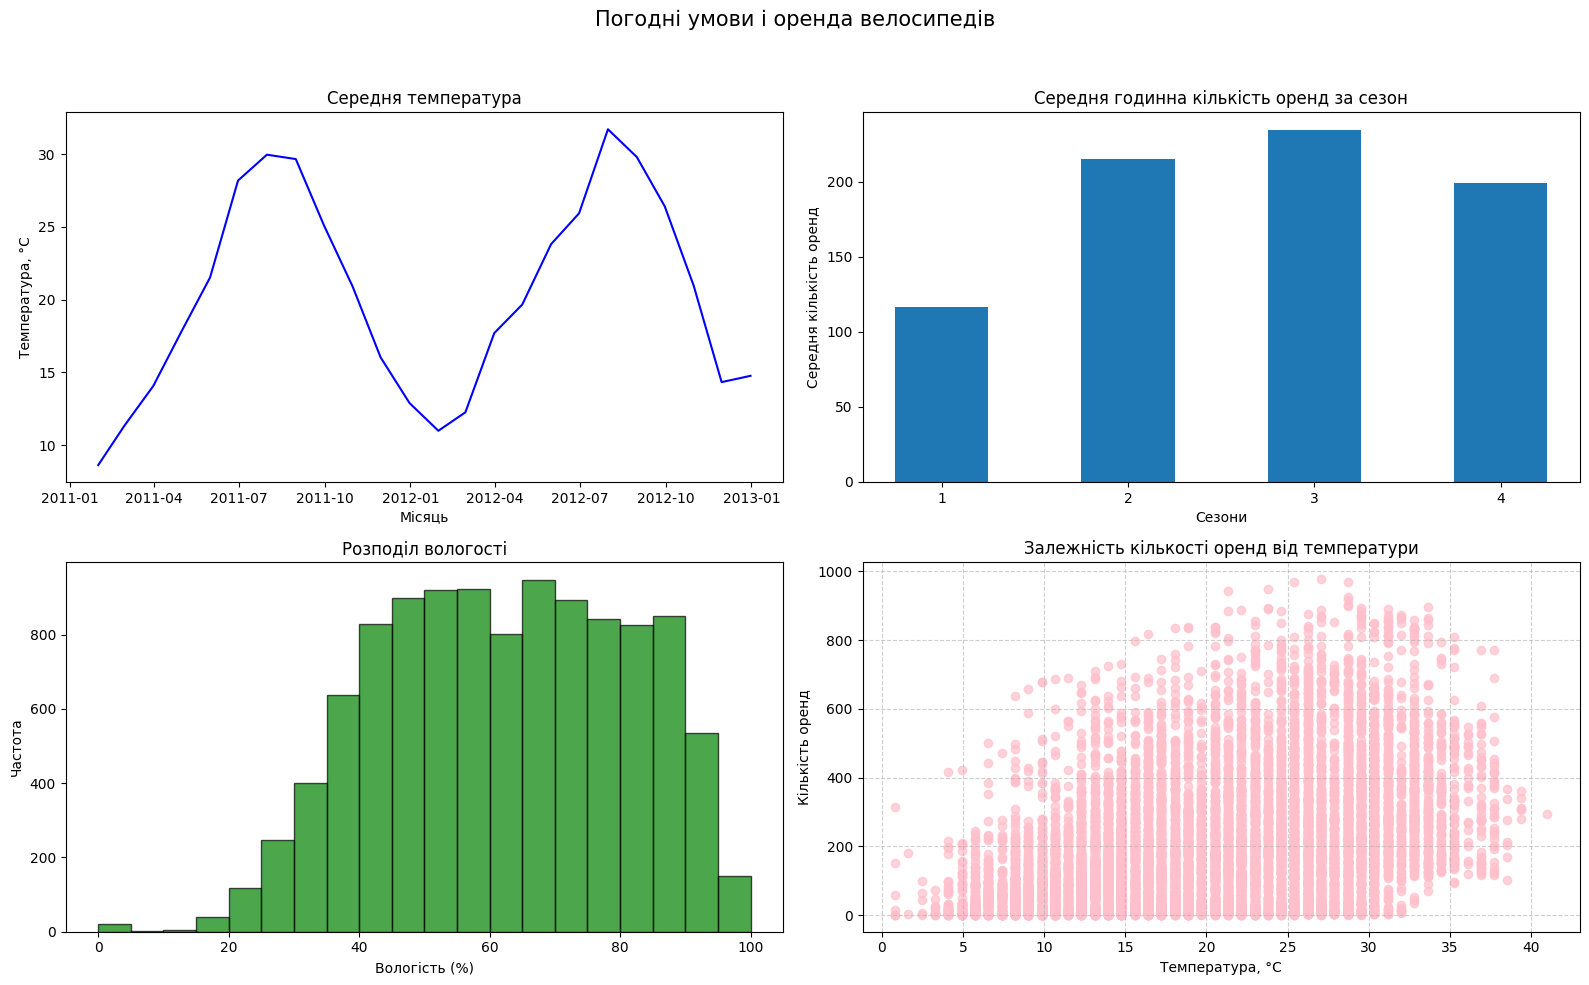

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))

# Лінійний графік
ax[0, 0].plot(monthly_temp, color='blue')
ax[0, 0].set_title('Середня температура')
ax[0, 0].set_xlabel('Місяць')
ax[0, 0].set_ylabel('Температура, °С')

# Стовпчиковий графік
ax[0, 1].bar(qtrly_count.index, qtrly_count.values, 0.5)
ax[0, 1].set_xticks(qtrly_count.index)
ax[0, 1].set_title('Середня годинна кількість оренд за сезон')
ax[0, 1].set_xlabel('Сезони')
ax[0, 1].set_ylabel('Середня кількість оренд')

# Гістограма
ax[1, 0].hist(df ['humidity'], bins=20, edgecolor='black', alpha=0.7, color='green')
ax[1, 0].set_title('Розподіл вологості')
ax[1, 0].set_xlabel('Вологість (%)')
ax[1, 0].set_ylabel('Частота')

# Графік розсіювання
ax[1, 1].scatter(df ['temp'], df ['count'], color='pink', alpha=0.7)
ax[1, 1].set_title('Залежність кількості оренд від температури')
ax[1, 1].set_xlabel('Температура, °C')
ax[1, 1].set_ylabel('Кількість оренд')
ax[1, 1].grid(True, linestyle='--', alpha=0.6)

# Заголовок дашборду
fig.suptitle('Погодні умови і оренда велосипедів', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Складно так одразу зрозуміти, адже я створював графіки почергово окремими блоками в обох випадках. Але у варіанті з plt.subplots() створюється вся фігура і об'єкти одразу, а у випадку з plt.subplot() ми створюємо і активуємо обєкти почергово. Також у варіанті plt.subplots() ми на початку кожної строки звертаємось до конкретного об'єкта і це полегшує розуміння і сприйняття того з яким саме з графіків ми зараз працюємо.

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

In [ ]:
import matplotlib.dates as mdates

In [ ]:
monthly_stats = df['count'].resample('ME').agg(['mean', 'max', 'min'])
monthly_stats.head()

,mean,max,min
datetime,,,
2011-01-31,54.645012,219,1
2011-02-28,73.641256,327,1
2011-03-31,86.849776,332,1
2011-04-30,111.026374,452,1
2011-05-31,174.809211,611,1


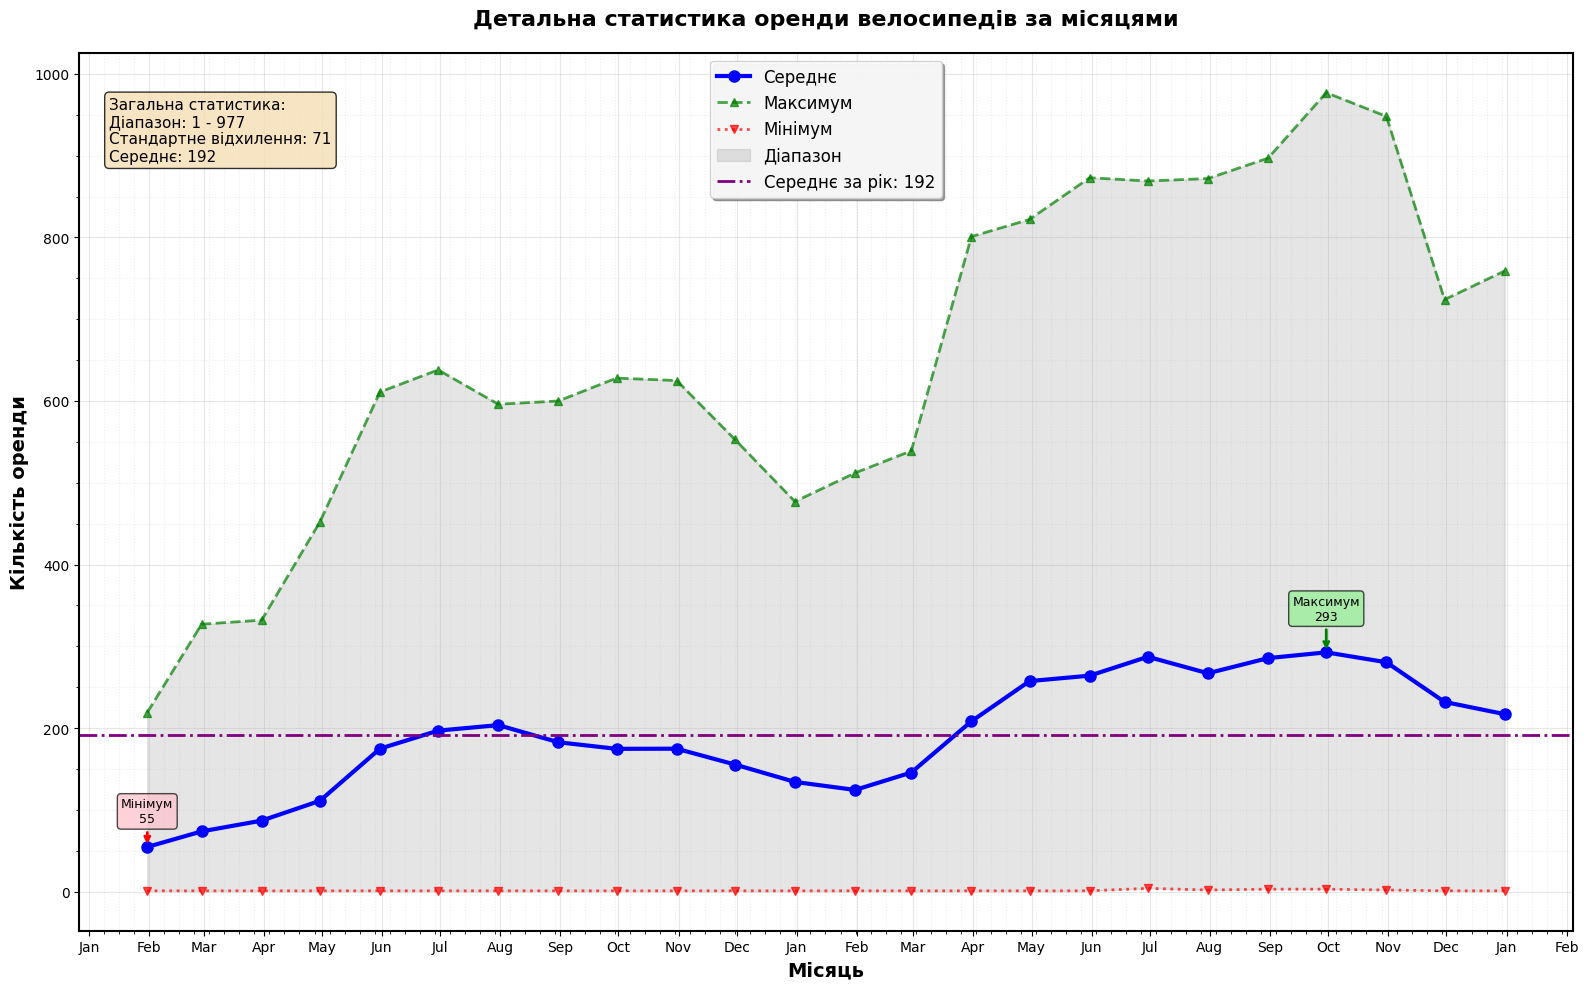

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))

# Малюємо лінії з різними стилями
ax.plot(monthly_stats.index, monthly_stats['mean'], 'b-o', linewidth=3,
        label='Середнє', markersize=8)
ax.plot(monthly_stats.index, monthly_stats['max'], 'g--^', linewidth=2,
        label='Максимум', markersize=6, alpha=0.7)
ax.plot(monthly_stats.index, monthly_stats['min'], 'r:v', linewidth=2,
        label='Мінімум', markersize=6, alpha=0.7)

# Заливка між max та min
ax.fill_between(monthly_stats.index, monthly_stats['min'], monthly_stats['max'],
                alpha=0.2, color='gray', label='Діапазон')

# Додаємо анотації для екстремальних значень
max_idx = monthly_stats['mean'].idxmax()
max_val = monthly_stats['mean'].max()
ax.annotate(f'Максимум\n{max_val:.0f}',
            xy=(max_idx, max_val), xytext=(max_idx, max_val + 40),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=9, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.7))

min_idx = monthly_stats['mean'].idxmin()
min_val = monthly_stats['mean'].min()
ax.annotate(f'Мінімум\n{min_val:.0f}',
            xy=(min_idx, min_val), xytext=(min_idx, min_val + 30),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=9, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='pink', alpha=0.7))

# Налаштування осей
ax.set_xlabel('Місяць', fontsize=14, fontweight='bold')
ax.set_ylabel('Кількість оренди', fontsize=14, fontweight='bold')
ax.set_title('Детальна статистика оренди велосипедів за місяцями',
             fontsize=16, fontweight='bold', pad=20)

# Форматування дат на осі X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Додаємо сітку з різними стилями
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.minorticks_on()

# Додаємо середню лінію за весь період
overall_mean = df['count'].mean()
ax.axhline(y=overall_mean, color='purple', linestyle='-.', linewidth=2,
           label=f'Середнє за рік: {overall_mean:.0f}')


# Покращуємо легенду
ax.legend(loc='upper center', fontsize=12, frameon=True, shadow=True,
          fancybox=True, framealpha=0.9)

# Додаємо текст з додатковою статистикою
textstr = 'Загальна статистика:\n'
textstr += f'Діапазон: {monthly_stats["min"].min():.0f} - {monthly_stats["max"].max():.0f}\n'
textstr += f'Стандартне відхилення: {monthly_stats["mean"].std():.0f}\n'
textstr += f'Середнє: {(overall_mean):.0f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.02, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

# Налаштування рамки
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()

1. Анотації дозволяють швидко акцентувати увагу на важливих елементах візуалізації.
2. fill_between() використовується для позначення області між двома лініями, в даному випадку - для позначення діапазону значень.
3. Текстовий блок дозволяє пришвидшити і покращити розуміння того, що відбувається на графіку, а також як і анотації дозволяє показати певні важливі елементи.